# Chapter 6: Decision Trees

### Ensure GPU Env is working correctly

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs Available:  1


In [3]:
import sys
import os
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

## Training and Visualizing a Decision Tree

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## Iris Decision Tree

In [5]:
import pydotplus

dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=iris.feature_names[2:], 
                               class_names=iris.target_names, rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

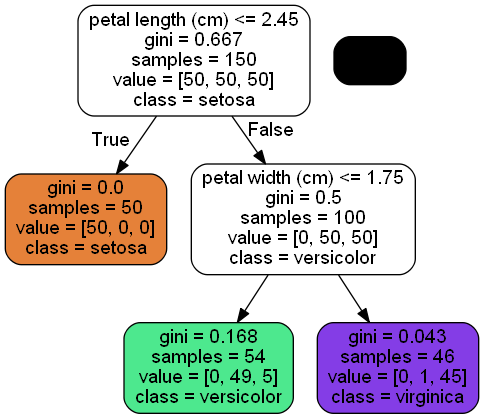

In [6]:
from IPython.display import Image

Image(graph.create_png())

## Making Predictions With a Decision Tree 

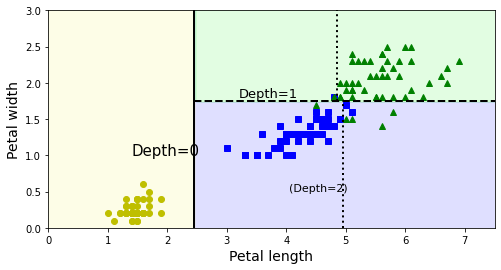

In [7]:
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Estimating Class Probabilities

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

In [10]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

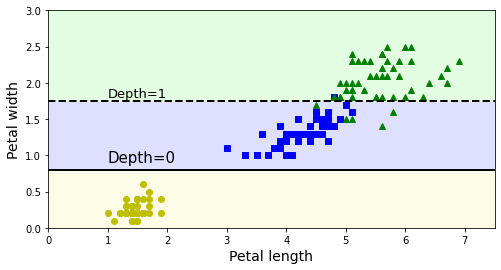

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

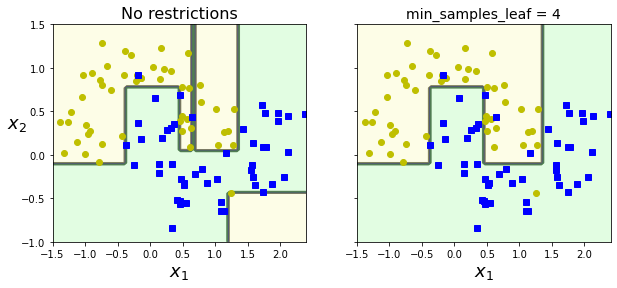

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

## Decision Tree Regression 

In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

## Decision Tree Regressor Visualization

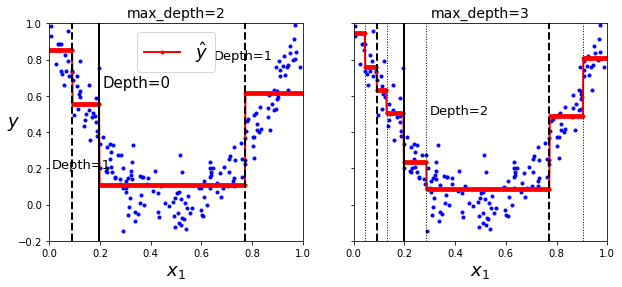

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [16]:
dot_data_2 = tree.export_graphviz(tree_reg1, out_file=None, feature_names=["x1"], rounded=True, filled=True)

graph2 = pydotplus.graph_from_dot_data(dot_data_2)

## Decision Tree Graph Image

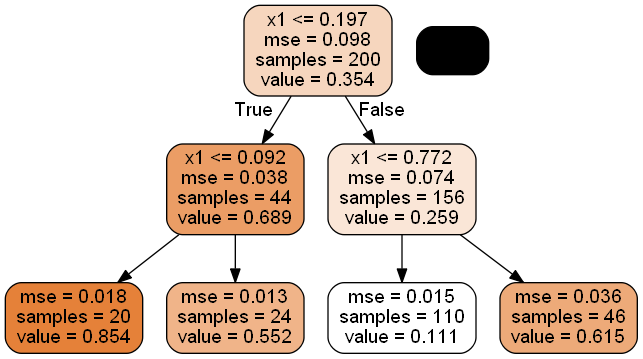

In [17]:
from IPython.display import Image

Image(graph2.create_png())

### Regularizing a Decision Tree Regressor Model

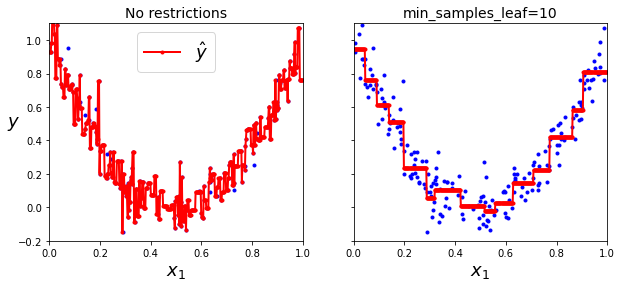

In [18]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### Training Data Set Rotation

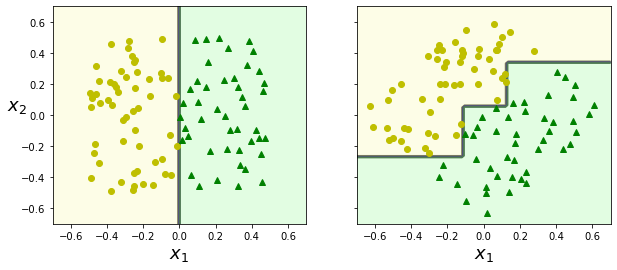

In [19]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

# End of Chapter Exercises

1. What is the approximate depth of a Decision Tree trained (without restrictions)
   on a training set with one million instances?
2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it 
   generally lower/greater, or always lower/greater?
3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing
   max_depth?
4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling
   the input features?
5. If it takes one hour to train a Decision Tree on a training set containing 1 million
   instances, roughly how much time will it take to train another Decision Tree on a
   training set containing 10 million instances?
6. If your training set contains 100,000 instances, will setting presort=True speed
   up training?
7. Train and fine-tune a Decision Tree for the moons dataset by following these
   steps:

    a) Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

    b) Use train_test_split() to split the dataset into a training set and a test set.

    c) Use grid search with cross-validation (with the help of the GridSearchCV class) to find       good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for             max_leaf_nodes.

    d) Train it on the full training set using these hyperparameters, and measure
    your model’s performance on the test set. You should get roughly 85% to 87%
    accuracy.
   
   
8. Grow a forest by following these steps:

   a) Continuing the previous exercise, generate 1,000 subsets of the training set,
   each containing 100 instances selected randomly. Hint: you can use ScikitLearn’s ShuffleSplit    class for this.
   
   b) Train one Decision Tree on each subset, using the best hyperparameter values
   found in the previous exercise. Evaluate these 1,000 Decision Trees on the test
   set. Since they were trained on smaller sets, these Decision Trees will likely
   perform worse than the first Decision Tree, achieving only about 80%
   accuracy.
   
   c) Now comes the magic. For each test set instance, generate the predictions of
   the 1,000 Decision Trees, and keep only the most frequent prediction (you can
   use SciPy’s mode() function for this). This approach gives you majority-vote
   predictions over the test set.
   
   d) Evaluate these predictions on the test set: you should obtain a slightly higher
   accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
   you have trained a Random Forest classifier!

***1. What is the approximate depth of a Decision Tree trained (without restrictions)
   on a training set with one million instances?***
   
A: For this situation you can take the equation 2<sup>n</sup> =  1,000,000 then take the log of both sides to get nlog(2) = log(1,000,000) which ~~ 20
   
***2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it 
   generally lower/greater, or always lower/greater?***

A: A node's Gini impurity is generally lower than its parents and this is because the CART algorithm is a greedy algorithm while optimally splitting at each subsequent level. In short, it tries to produce the purest subsets. This is not always the case, there can be situations where lower nodes have a higher impurity than the previous level, but for the most part it is generally lower.

***3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing
   max_depth?***

A: Yes, this is one way of restricting the Decision Tree's degrees of freedom during training (regularization). for Scikit-Learn, this is controlled by the max_depth parameter. So that is a good place to start. 
   
***4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling
   the input features?***
   
A: Decision tree data doesn't need to be scaled or not to get a good or equally bad result. You may need another technique to focus on decision trees underfitting the data.
   
***5. If it takes one hour to train a Decision Tree on a training set containing 1 million
   instances, roughly how much time will it take to train another Decision Tree on a
   training set containing 10 million instances?***
   
A: Well, computationally in O-notation, Decision trees have a complexity of O(n x m log(m)). So your equation would multiply by 10 to give you the following look: K = (10 x m x log(10m)) where n = 10 now divide (10m x log(10m))/(m x log(m)) where m is 1,000,000 this is roughly: ~
161,180,956/13,815,510 ~= 11.7 hours 
   
***6. If your training set contains 100,000 instances, will setting presort=True speed
   up training?***
 
A: Using the presort method = True will only speed up training on smaller datasets (Ex. a couple thousand instances). If it training a hundred thousand examples or several hundred thousand examples, this will have the opposite effect and will increase total training time.

In [20]:
# Question 7
# a)
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

In [21]:
# b)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# c)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
params = {'max_leaf_nodes': list(range(2, 200)), 'min_samples_split': [2, 3, 4, 5, 6, 7]}
grid_search_cv = GridSearchCV(DTC, params, verbose=2, cv=5)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min

[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_l

[CV] END .............max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=6; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=21, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=25, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=6; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=33, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=6; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=40, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=44, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=6; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=52, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=55, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=59, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=59, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=63, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=63, min_samples_split=5; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=66, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=66, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=66, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=66, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=70, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=70, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=74, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=74, min_samples_split=5; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=77, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=77, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=81, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=81, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=85, min_samples_split=5; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=88, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=88, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=88, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=88, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=88, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=89, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=92, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=95, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=96, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=99, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=99, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END ............max_leaf_nodes=103, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=103, min_samples_split=4; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=106, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=106, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=107, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=107, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=110, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=110, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=113, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=113, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=113, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=114, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=117, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=117, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=121, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=121, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=124, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=124, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=124, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=128, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=128, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=131, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=131, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=131, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=131, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=131, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=131, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=131, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=135, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=135, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=135, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=135, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=135, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=143, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=5; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=146, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=146, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=150, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=150, min_samples_split=4; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=153, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=153, min_samples_split=7; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=156, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=156, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=156, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=157, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=160, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=160, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=163, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=163, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=164, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=164, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=164, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=167, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=167, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=168, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=168, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=168, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=171, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=171, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=175, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=175, min_samples_split=5; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=179, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=179, min_samples_split=4; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=182, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=182, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=182, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=183, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=186, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=186, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=186, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=186, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=186, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=186, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=186, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=187, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=187, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=187, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=187, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=187, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=190, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=190, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=191, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=194, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=194, min_samples_split=7; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=198, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=198, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             verbose=2)

In [23]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=23)

In [24]:
# d)
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.864

In [30]:
#8
#a)
from sklearn.model_selection import ShuffleSplit

X, y = make_moons(n_samples=10000, noise=0.4)
split_sets = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
moon_split = ShuffleSplit(n_splits=1000, test_size = len(X_train) - 100)
for train_index, test_index in moon_split.split(X_train):
    X_mini_train_split = X_train[train_index]
    y_mini_train_split = y_train[train_index]
    split_sets.append((X_mini_train_split, y_mini_train_split))
    


In [31]:
DTC = DecisionTreeClassifier()
params = {'max_leaf_nodes': list(range(2, 200)), 'min_samples_split': [2, 3, 4, 5, 6, 7]}
grid_search_cv = GridSearchCV(DTC, params, verbose=2, cv=5)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min

[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=6, min_samples_split=4; total time=   0.0s
[CV] END ..............max_l

[CV] END .............max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=10, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=13, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=14, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=17, min_samples_split=6; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=20, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=20, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=20, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=20, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=20, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=20, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=21, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=24, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=24, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=24, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=24, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=25, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=33, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=36, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=37, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=40, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=44, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=45, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=48, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=48, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=52, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=52, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=56, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=56, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=60, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=60, min_samples_split=6; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=67, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=68, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=68, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=68, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=68, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=68, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=71, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=71, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=75, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=75, min_samples_split=5; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=78, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=82, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=82, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=86, min_samples_split=5; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=89, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=90, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=93, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=93, min_samples_split=7; total time=   0.0s
[CV] END .............max_leaf_nodes=94, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=94, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=94, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=94, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=97, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=5; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=6; total time=   0.0s
[CV] END .............max_leaf_nodes=97, min_samples_split=7; total time=   0.0s
[CV] END .............max_le

[CV] END ............max_leaf_nodes=101, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=101, min_samples_split=4; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=104, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=104, min_samples_split=7; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=108, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=108, min_samples_split=4; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=111, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=111, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=112, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=112, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=115, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=115, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=118, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=118, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=118, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=118, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=118, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=118, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=119, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=119, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=119, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=119, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=119, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=119, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=122, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=122, min_samples_split=5; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=125, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=125, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=126, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=129, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=129, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=132, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=132, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=133, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=136, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=136, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=139, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=140, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=143, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=143, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=144, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=147, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=147, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=151, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=151, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=155, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=155, min_samples_split=7; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=158, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=158, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=158, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=159, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=162, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=162, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=166, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=166, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=169, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=169, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=169, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=169, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=169, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=169, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=169, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=170, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=170, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=170, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=170, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=170, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=173, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=173, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=174, min_samples_split=2; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=177, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=6; total time=   0.0s
[CV] END ............max_leaf_nodes=177, min_samples_split=6; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=181, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=181, min_samples_split=5; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=185, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=185, min_samples_split=5; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=189, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=5; total time=   0.0s
[CV] END ............max_leaf_nodes=189, min_samples_split=5; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=193, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=4; total time=   0.0s
[CV] END ............max_leaf_nodes=193, min_samples_split=4; total time=   0.0s
[CV] END ............max_lea

[CV] END ............max_leaf_nodes=196, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=196, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=196, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=196, min_samples_split=7; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=2; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=3; total time=   0.0s
[CV] END ............max_leaf_nodes=197, min_samples_split=3; total time=   0.0s
[CV] END ............max_lea

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             verbose=2)

In [32]:
#b)
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(1000)]

accuracy_scores = []

for tree, (X_mini_train_split, y_mini_train_split) in zip(forest, split_sets):
    tree.fit(X_mini_train_split, y_mini_train_split)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7987029999999999

In [33]:
#c
Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [34]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [36]:
#d)

accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.871